In [1]:
import flow
import numpy as np
import signac
from project import MyProject

print(signac.__version__)
print(flow.__version__)

1.4.0
0.10.0


### Before running this notebook:

First, run `python init.py` at least once to initialize the project. 

Then, run `python project.py run`, which will run all the operations in `project.py`.

Then, we get obtain a project handle.

In [2]:
project = MyProject()
print(project)

Ideal-Gas-Example-Project


Just like on the command line, we can display the project's status:

In [3]:
project.print_status(detailed=True, parameters=["p"])


Overview:

Total # of jobs: 10

label      ratio
---------  --------------------------------------------------
started    |████████████████████████████████████████| 100.00%
sampled    |████████████████████████████████████████| 100.00%
estimated  |████████████████████████████████████████| 100.00%

operation
-----------


Detailed View:

job_id                            operation      p  labels
--------------------------------  -----------  ---  ---------------------------
63916753d859b746260110cc7fa466f6  [ ]          4    estimated, sampled, started
f99063a7cd4cf487269f8c4ed43759c4  [ ]          5    estimated, sampled, started
d9b62db8206b06b0e207131496540c23  [ ]          1    estimated, sampled, started
90a557e41c1ecd6f5f4b4be0ab4db1f7  [ ]          2    estimated, sampled, started
ef88d06507fcf26a0e78e1b9868e803e  [ ]          4.5  estimated, sampled, started
711859c5bdd941ee517db2be3d720ddc  [ ]          3.5  estimated, sampled, started
c824bd5f59d603800b38f13c00e87634  [ ]     

We want to compare the volume estimate using the ideal gas law and the measurements from the molecular dynamics simulation.

We implement the `get_volume()` function to extract the volume from the log file.

In [4]:
def get_volume(job):
    try:
        log = np.genfromtxt(job.fn("dump.log"), names=True)
        N = len(log)
        return log[int(0.5 * N) :]["volume"].mean(axis=0)
    except OSError:
        pass


for job in project.find_jobs():
    print(job.statepoint()["p"], get_volume(job))

4.0 614.750191224
5.0 593.777573608
1.0 903.9505265920001
2.0 741.011125508
4.5 600.001185592
3.5 634.2033970919999
1.5 791.728728196
2.5 686.3928969000001
3.0 662.2078703
0.5 1139.3264905719998


For a better presentation of the results we need to aggregate all results and sort them by pressure.

*The following code requires matplotlib.*

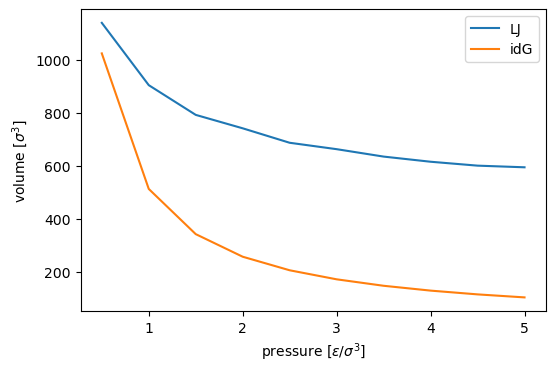

In [6]:
# Display plots within the notebook
from matplotlib import pyplot as plt

%matplotlib inline

V = dict()
V_idg = dict()

for job in project.find_jobs():
    V[job.statepoint()["p"]] = get_volume(job)
    V_idg[job.statepoint()["p"]] = job.document["volume_estimate"]

p = sorted(V.keys())
V = [V[p_] for p_ in p]
V_idg = [V_idg[p_] for p_ in p]

plt.figure(dpi=100)
plt.plot(p, V, label="LJ")
plt.plot(p, V_idg, label="idG")
plt.xlabel(r"pressure [$\epsilon / \sigma^3$]")
plt.ylabel(r"volume [$\sigma^3$]")
plt.legend()
plt.show()